In [1]:
%pylab qt
%matplotlib inline
import fitting
import pandas
import random as rd

def noise(n, scale=1):
    data = []
    for i in range(n):
        number = scale * (rd.triangular()-0.5)*2
        data.append(number)
    return np.array(data)

Populating the interactive namespace from numpy and matplotlib


# Linear

##### Fit results #####
RAW
        optimised params : [ 3.00675856 50.49130366]
        uncertainties    : [0.06778878 0.40134208]
        chi2r            : 0.603279484058759
READABLE
        slope      = (3.01 +/- 0.07) * 1e0
        y0         = (5.05 +/- 0.04) * 1e1
#######################


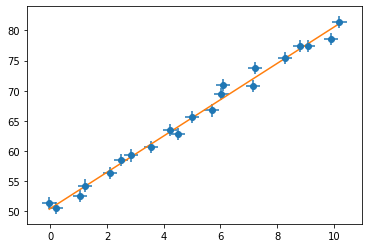

In [2]:
#Create false data and plot them
x  = np.linspace(0, 10, 21)
y  = np.pi*x+50 + noise(len(x), 2)
x += noise(len(x), 0.5) 
ux = np.ones(len(x))*0.25
uy = np.ones(len(x))*1

plt.errorbar(x, y, xerr=ux, yerr=uy, fmt="o")

#Calculate best params for linear fit and plot fit curve
fitter = fitting.Fit("linear", x=x, y=y, uy=uy, ux=ux)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)
yfit = fitter.func(x, *fit_params)
plt.plot(x, yfit)

##### Fit results #####
RAW
        optimised params : [ 3.00675856 50.49130366]
        uncertainties    : [0.06778878 0.40134208]
        chi2r            : 0.603279484058759
READABLE
        slope      = (3.01 +/- 0.07) * 1e0
        y0         = (5.05 +/- 0.04) * 1e1
#######################


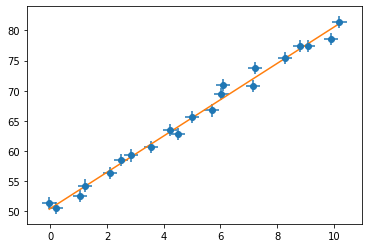

In [3]:
#Also works with pandas.series

data = pandas.Series(y, index=x)
plt.errorbar(x, y, xerr=ux, yerr=uy, fmt="o")

#Calculate best params for linear fit and plot fit curve
fitter = fitting.Fit("linear", data=data, uy=uy, ux=ux)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)
yfit = fitter.func(x, *fit_params)
plt.plot(x, yfit)

# Functions available

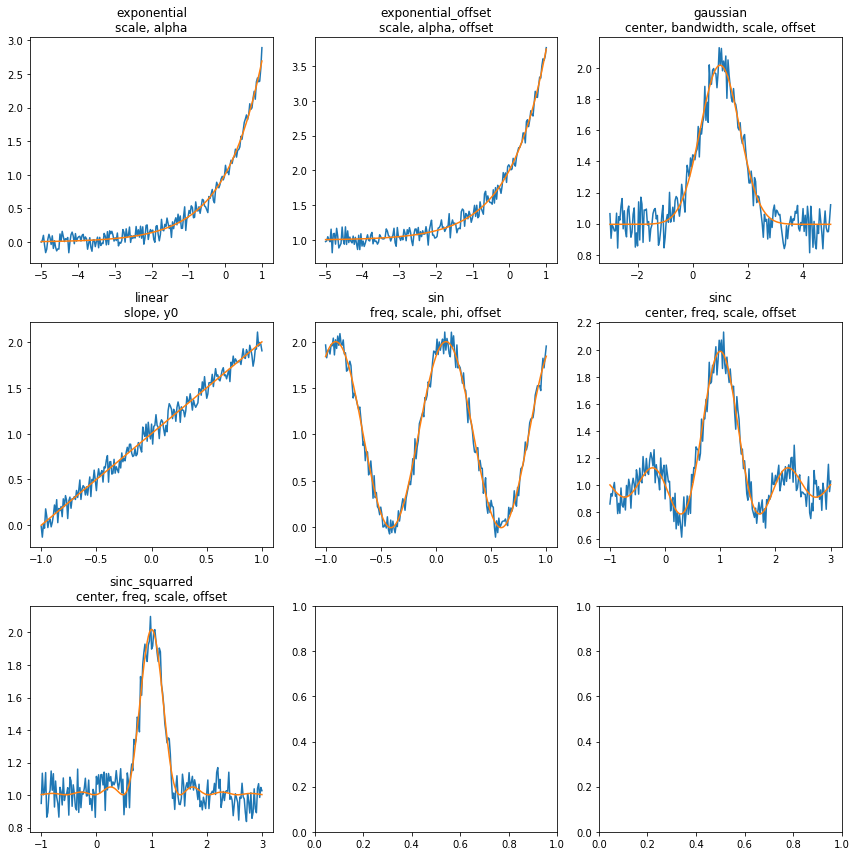

In [19]:
fig = plt.figure(figsize=(12,12))
sps = (3,3)
axes = []
for i in range(sps[0]*sps[1]):
    nrow = i//sps[0]
    ncol = i%sps[1]
    axes.append(plt.subplot2grid(sps, (nrow,ncol)))

funcs = ["exponential", "exponential_offset", "gaussian", "linear", "sin", "sinc", "sinc_squarred"]
while len(funcs) < len(axes):
    funcs.append(None)

for ax, func in zip(axes, funcs):
    if func is not None:
        if "exponential" in func:
            xmin, xmax = -5, 1
        elif "sinc" in func:
            xmin, xmax = -1, 3
        elif "gaussian" in func:
            xmin, xmax = -3, 5
        else:
            xmin, xmax = -1, 1
        x     = np.linspace(xmin, xmax, 201)
        xfit  = x
        y     = np.zeros(len(x))
        uy    = np.ones(len(x))*0.15
        noisy = noise(len(x), 0.2)
        fitter = fitting.Fit(func, x=x, y=y, uy=uy)
        guessparams = np.ones(fitter.number_of_fitparams)
        y = fitter.func(x, *guessparams) + noisy 
        #ax.errorbar(x, y, yerr=uy, fmt="o")
        ax.plot(x, y, "-")
        fitter = fitting.Fit(func, x=x, y=y, uy=uy)
        fit_params, ufit_params = fitter.fit(manualguess_params=guessparams, verbosemode=False)
        yfit = fitter.func(xfit, *fit_params)
        ax.plot(xfit, yfit)
        subtitle = ""
        for key in fitter.params_key:
            subtitle += key+", "
        ax.set_title(func+"\n"+subtitle[:-2])
plt.tight_layout()